In [29]:
import sys
from pathlib import Path

p = Path.cwd().resolve()
repo_root = next((parent for parent in [p] + list(p.parents) if (parent / ".git").exists()), None)
if repo_root is None:
    raise RuntimeError("Repo root not found. Open the repo folder in VS Code.")

sys.path.insert(0, str(repo_root))
print("Repo root:", repo_root)

Repo root: /Users/samiullah/Group_Project_Y3


# Gather LM
If clusters change, this auto-updates

In [30]:
import pandas as pd

In [31]:
county_lm = pd.read_csv(f"{str(repo_root)}/cleaned/00_labour_markets/county_lm.csv")

In [32]:
county_lm

,county_code,lm_id
0,201.0,23
1,202.0,4
2,203.0,16
3,204.0,26
4,205.0,16
...,...,...
375,3217.0,32
376,3218.0,3
377,3261.0,13
378,3262.0,3


# Aggregating Share by LM

In [33]:
prewar_shares = pd.read_csv(f"{str(repo_root)}/cleaned/00_prewar_ukrainian_shares/citizenship_ukr.csv").merge(county_lm, on='county_code')

In [34]:
total_ukr_in_poland = prewar_shares['total_ukr'].iloc[0]

In [35]:
prewar_shares_lm = prewar_shares.groupby('lm_id')['ukr_citizens'].sum().reset_index()
prewar_shares_lm['ukr_citizens_share'] = prewar_shares_lm['ukr_citizens'] / total_ukr_in_poland
prewar_shares_lm

,lm_id,ukr_citizens,ukr_citizens_share
0,0,3092,0.058287
1,1,326,0.006145
2,2,1048,0.019756
3,3,2117,0.039907
4,4,6505,0.122625
...,...,...,...
73,73,267,0.005033
74,74,746,0.014063
75,75,829,0.015627
76,76,7194,0.135613


In [46]:
import geopandas as gpd

path = f"{str(repo_root)}/shape/lm/lm_polygon.shp"
lm = gpd.read_file(path)

temp = lm.merge(prewar_shares_lm, on='lm_id')

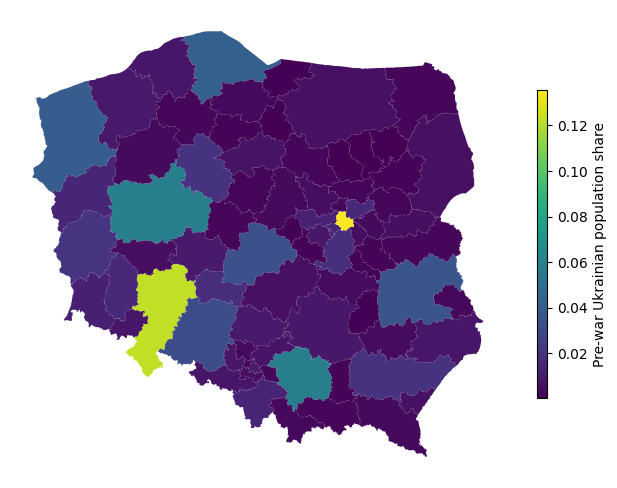

In [52]:
ax = temp.plot(
    column="ukr_citizens_share",
    cmap="viridis",
    linewidth=0.4,
    figsize=(8, 10),  
    legend=True, 
    legend_kwds={
        "shrink": 0.4,      # smaller colorbar
        "aspect": 30,       # thinner
        "label": "Pre-war Ukrainian population share"
    }
)

ax.set_axis_off()

# Shift Share

In [53]:
prewar_shares_lm

,lm_id,ukr_citizens,ukr_citizens_share
0,0,3092,0.058287
1,1,326,0.006145
2,2,1048,0.019756
3,3,2117,0.039907
4,4,6505,0.122625
...,...,...,...
73,73,267,0.005033
74,74,746,0.014063
75,75,829,0.015627
76,76,7194,0.135613


In [55]:
inflows = pd.read_csv(f"{str(repo_root)}/cleaned/01_inflow_data/inflow_semi_cleaned.csv")   
inflows

,date,teryt,powiat,voivodeship,total_all,total_male,total_female,male_0,male_1,male_2,...,female_20-24,female_25-29,female_30-34,female_35-39,female_40-44,female_45-49,female_50-54,female_55-59,female_60-64,female_65+
0,2022-04-14,201.0,BOLESŁAWIECKI,DOLNOŚLĄSKIE,2900.0,792.0,2108.0,2.000000,28.0,20.0,...,136.0,146.0,194.0,272.0,189.0,127.0,84.0,67.0,60.0,91.0
1,2022-04-14,202.0,DZIERŻONIOWSKI,DOLNOŚLĄSKIE,2533.0,708.0,1825.0,5.000000,23.0,24.0,...,96.0,122.0,206.0,219.0,160.0,89.0,74.0,59.0,59.0,103.0
2,2022-04-14,203.0,GŁOGOWSKI,DOLNOŚLĄSKIE,1557.0,454.0,1103.0,0.666667,11.0,16.0,...,58.0,81.0,130.0,130.0,114.0,49.0,38.0,33.0,25.0,55.0
3,2022-04-14,204.0,GÓROWSKI,DOLNOŚLĄSKIE,576.0,160.0,416.0,0.428571,5.0,11.0,...,21.0,19.0,40.0,64.0,35.0,20.0,13.0,7.0,24.0,25.0
4,2022-04-14,205.0,JAWORSKI,DOLNOŚLĄSKIE,1417.0,410.0,1007.0,2.000000,11.0,19.0,...,34.0,73.0,98.0,129.0,100.0,56.0,35.0,33.0,42.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,2026-01-13,3217.0,WAŁECKI,ZACHODNIOPOMORSKIE,622.0,259.0,363.0,0.600000,0.6,4.0,...,27.0,15.2,17.2,33.0,34.4,28.8,20.8,16.8,17.6,28.2
22036,2026-01-13,3218.0,ŁOBESKI,ZACHODNIOPOMORSKIE,378.0,129.0,249.0,0.400000,0.4,0.4,...,14.8,13.2,15.0,19.0,22.6,20.2,18.8,11.6,9.2,16.6
22037,2026-01-13,3261.0,KOSZALIN,ZACHODNIOPOMORSKIE,3010.0,1270.0,1740.0,0.000000,11.0,15.0,...,178.0,113.2,100.0,126.8,154.0,147.8,93.4,67.8,62.8,140.2
22038,2026-01-13,3262.0,SZCZECIN,ZACHODNIOPOMORSKIE,14115.0,6178.0,7937.0,0.000000,11.0,49.0,...,855.8,586.0,575.0,642.6,645.0,549.8,429.2,321.8,274.2,699.6


In [ ]:
print('ch')